<a href="https://colab.research.google.com/github/Musthuu/Capstone-Project1/blob/main/Individual_Play_Store_App_Review_Analysis_Capstone_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [ ]:
#importing the Python Libraries
from ast import increment_lineno
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
%matplotlib inline



In [ ]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


In [ ]:
import cufflinks as cf
cf.go_offline()

In [ ]:
init_notebook_mode(connected = True)

In [ ]:
#Importing the Data Set.
file_path = '/content/Play Store Data.csv'
file_path2 = '/content/User Reviews.csv'
df1 = pd.read_csv(file_path)
df2 = pd.read_csv(file_path2)

In [ ]:
df2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
df1.shape

(10841, 13)

In [ ]:
df2.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [ ]:
df1.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
df1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
df1.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


#Data Cleaning.

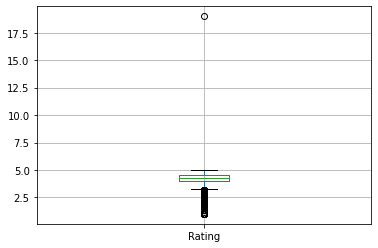

In [ ]:
df1.boxplot();

We can see an outlier on the top.

#Checking how many outliers are present.

In [ ]:
df1[df1.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


We can see 1 row which has 19 Rating which is not possible, the Rating should be in between 0-5 so lets get rid of it.

In [ ]:
df1.drop([10472], inplace = True)

Let's check the boxplot again to see if the outlier is present.

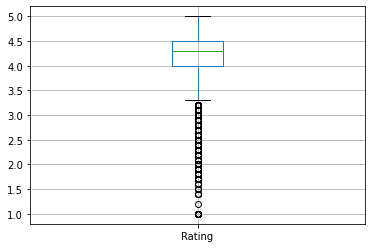

In [ ]:
df1.boxplot();

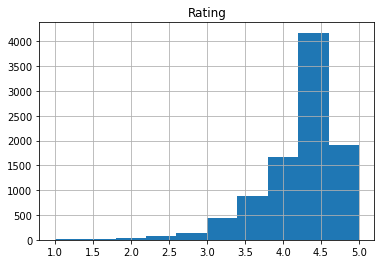

In [ ]:
#Histogram view of the data
df1.hist();


#Deleting the unwanted Columns

In [ ]:
## Delete unwanted columns
df1.drop(['Android Ver', 'Current Ver', 'Last Updated'], axis=1, inplace=True)

<p>
    The above columns had missing  values:
    (1) Rating
    (2) Type
    (3) Content Rating
    (4) Current Ver
    (5) Android Ver
 </p> 

In [ ]:
df1['Rating'].isnull().sum(), df1['Rating'].shape[0]

(1474, 10840)

In [ ]:
df1['Rating'].value_counts().sum()

9366

Out of 10841 ratings, 1474 are with null values and remaining 9367 have ratings


#EDA (Exploratory Data Analysis)

#1.Distribution of App Rating

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



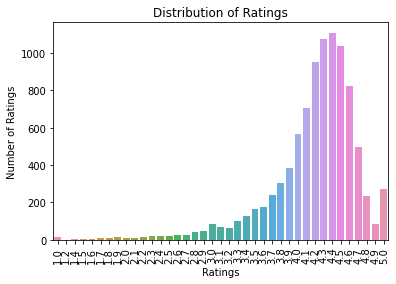

In [ ]:
from matplotlib import rc
g = sns.countplot('Rating', data=df1)
sns.set(rc= {'figure.figsize' :(20,6)})
plt.xticks(rotation = 90)
plt.title("Distribution of Ratings")
plt.ylabel('Number of Ratings')
plt.xlabel('Ratings')
plt.show()

#What are the implication of the above analysis?
* Most of the apps are rated between 3.7 to 5
* There are only few apps which are rated less than 3
* Maximun number of the apps are rated between 4.2 and 4.6


# 2.What are the top Content_Rating values?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



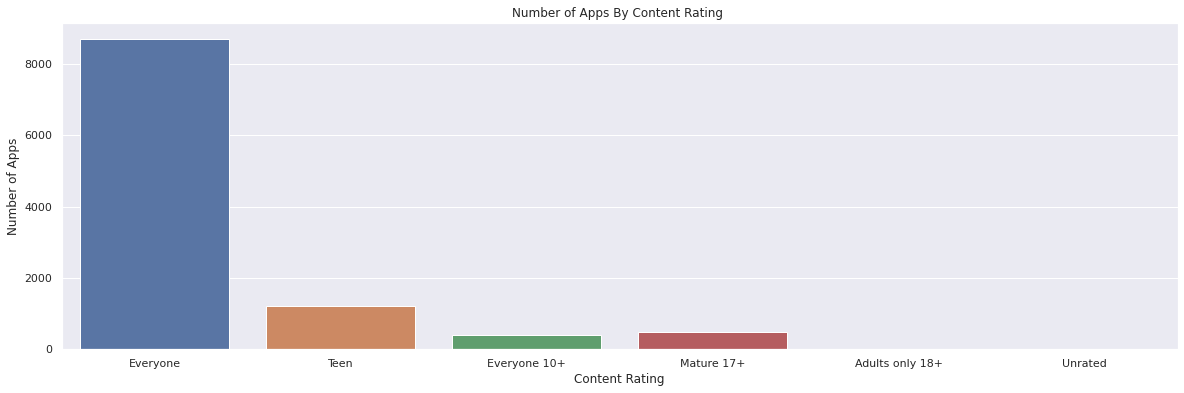

In [ ]:
g = sns.countplot(df1['Content Rating'])
plt.title("Number of Apps By Content Rating ")
sns.set(rc = {'figure.figsize':(15,10)})
plt.ylabel('Number of Apps')
plt.show()

#From the above Graph we got to know that
* Adults only 18+ and Unrated are with very less munber of apps.
* 'Everyone' has more number of Apps when compared to others.

#3.Rating vs Content Rating
A bar graph displaying the Rating for each Content Rating

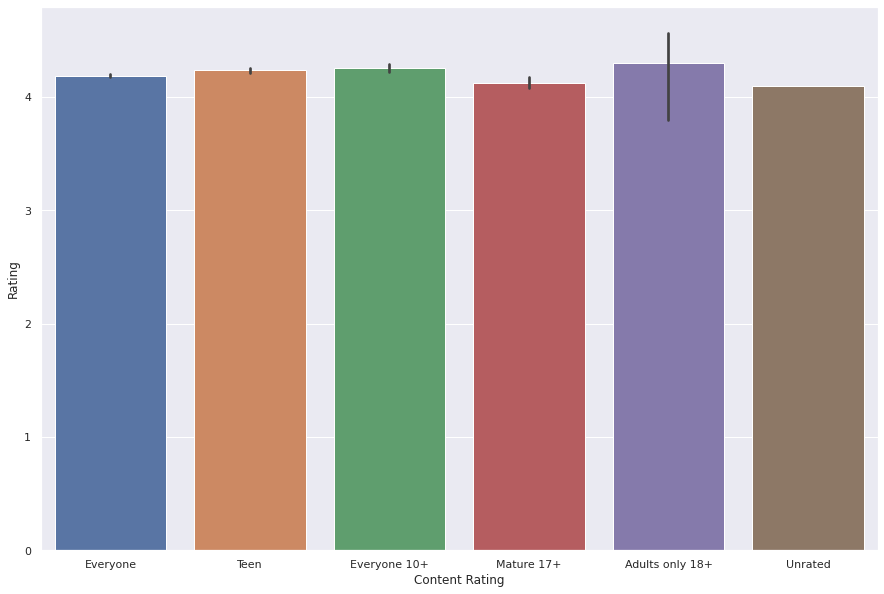

In [ ]:
sns.barplot(x = 'Content Rating',y = 'Rating', data = df1)
sns.set(rc ={ 'figure.figsize':(30,6)})

#From the above graph we can see that the average rating of each content_rating has the rating above 4, The Adults only 18+ has heighest Rating when compared to others.

In [ ]:
df1['Rating'].value_counts()

4.4    1109
4.3    1076
4.5    1038
4.2     952
4.6     823
4.1     708
4.0     568
4.7     499
3.9     386
3.8     303
5.0     274
3.7     239
4.8     234
3.6     174
3.5     163
3.4     128
3.3     102
4.9      87
3.0      83
3.1      69
3.2      64
2.9      45
2.8      42
2.7      25
2.6      25
2.5      21
2.3      20
2.4      19
1.0      16
2.2      14
1.9      13
2.0      12
1.7       8
1.8       8
2.1       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64

#4.Rating Category

In [ ]:
def rating_group(rating):

    try:
        rating = round(rating)
        if int(rating) in range(0,3):
            return 'low'
        elif int(rating) in range(3,5):
            return 'Average'
        elif int(rating) in range(4,6):
            return 'High'
    except ValueError as error:
        return 'none'

    
df1['rating_group'] = df1['Rating'].apply(rating_group)

In [ ]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,rating_group
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,Average
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,Average
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,Average
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,Average


##We can see a New Column is added at the end 'rating_group'.

In [ ]:
df1['rating_group'].value_counts()

Average    7299
High       1917
none       1474
low         150
Name: rating_group, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



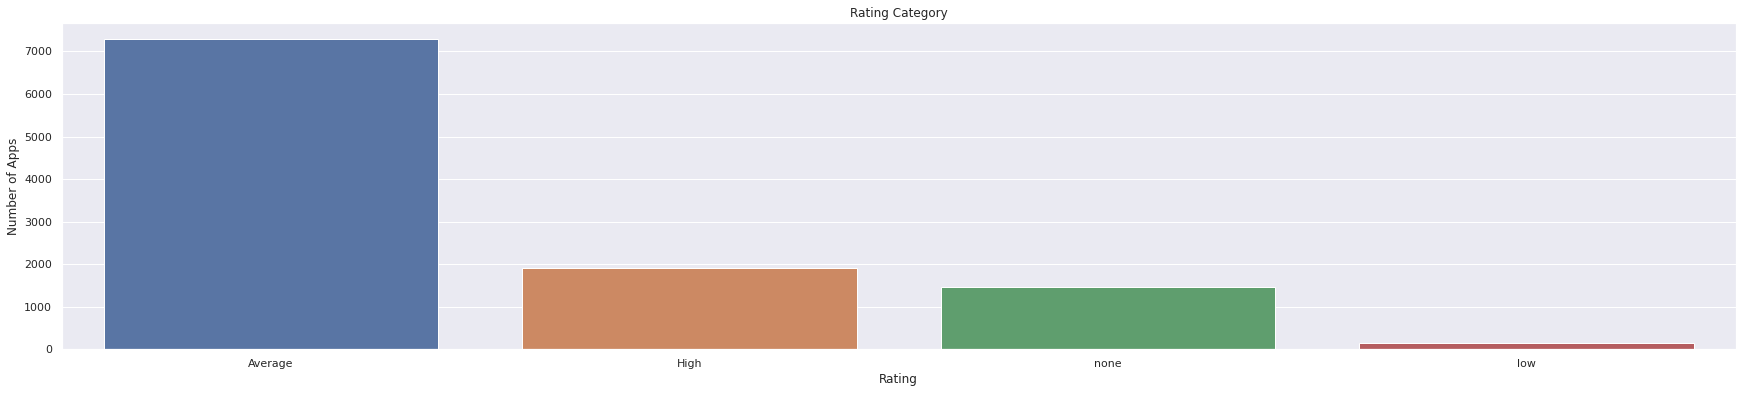

In [ ]:
g = sns.countplot('rating_group', data=df1)
sns.set(rc= {'figure.figsize' :(30,6)})
plt.title("Rating Category")
plt.ylabel('Number of Apps')
plt.xlabel('Rating')
plt.show()


#From the above graph we can observe that there are more average ratings that are between 3 and 4.5

In [ ]:
# check the Average Rating App Type
df1['Type'].value_counts()

Free    10039
Paid      800
Name: Type, dtype: int64

#5.We can see that most of the apps are Free, Lets check user gives what type of 



rating for free apps

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



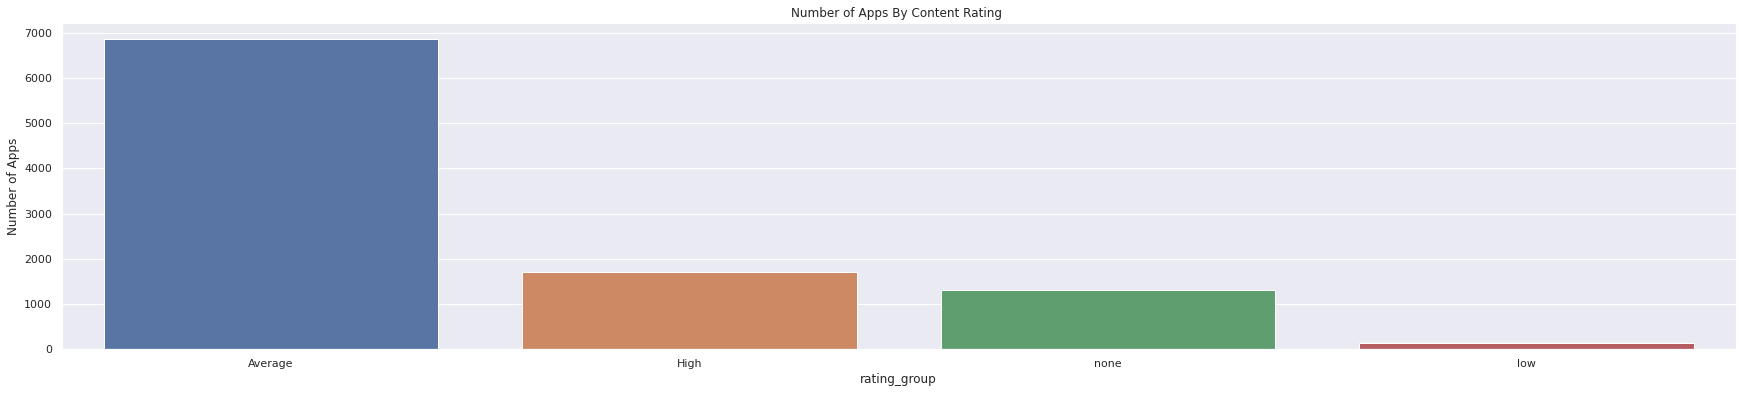

In [ ]:
g = sns.countplot(df1[df1.Type=='Free']['rating_group'])
plt.title("Number of Apps By Content Rating ")
plt.ylabel('Number of Apps')
sns.set(rc = {'figure.figsize':(15,10)})
plt.show()


We can see Users reviewed less than 7000 apps with the average rating between 3-4.5, and reviewed less than 2000 Apps with High Rating close to 5. 

#6.High Rating Apps
* Based on App Category

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



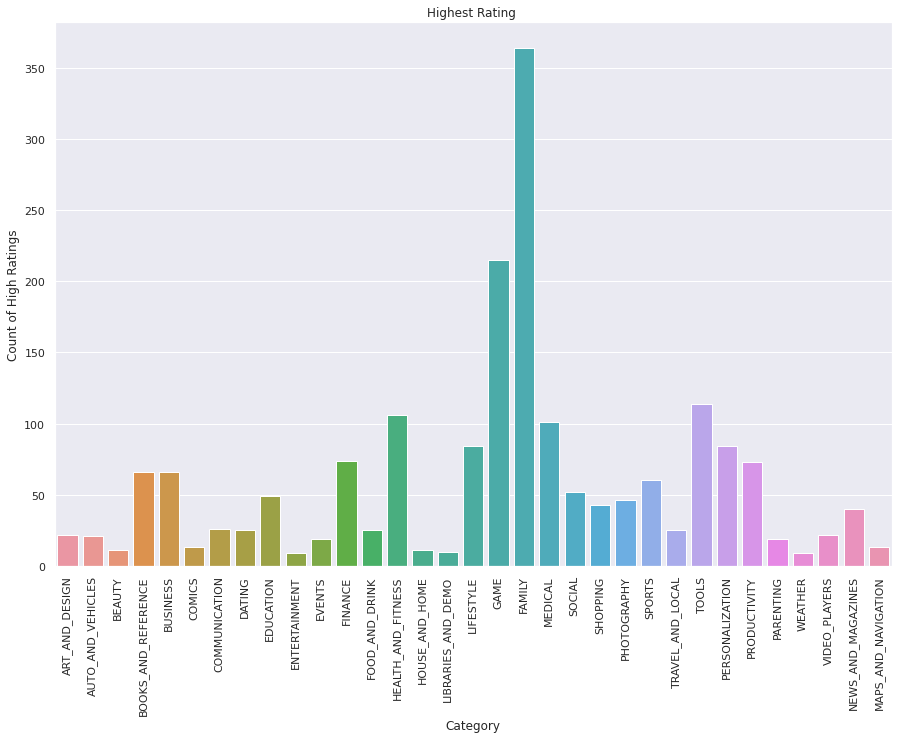

In [ ]:
# let's check the Highest rating app
g = sns.countplot(df1[df1['rating_group'] =='High']['Category'])
plt.xticks(rotation = 90)
plt.title("Highest Rating ")
plt.xlabel("Category")
plt.ylabel("Count of High Ratings")
sns.set(rc = {'figure.figsize':(20,6)})
plt.show()


#Observation
* Apps with Family and Game as category has the highest rating.
* Most of the users go for Family and Game categories of apps.

#7.Since we know Family has high reviews and rating now lets find out the top High rating apps in Family.

In [ ]:
# Looking for high rating_group.
high_rating_app = df1[df1['rating_group'] == 'High']
high_rating_app.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,rating_group
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,High
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,High
13,Mandala Coloring Book,ART_AND_DESIGN,4.6,4326,21M,"100,000+",Free,0,Everyone,Art & Design,High
16,Photo Designer - Write your name with shapes,ART_AND_DESIGN,4.7,3632,5.5M,"500,000+",Free,0,Everyone,Art & Design,High
19,ibis Paint X,ART_AND_DESIGN,4.6,224399,31M,"10,000,000+",Free,0,Everyone,Art & Design,High


Now lets look for the highest reviews and rating apps in Family.

In [ ]:
high_rating_app[high_rating_app.Category == 'FAMILY']['App'][:5]

2020    Super ABC! Learning games for kids! Preschool ...
2023                                      Candy Pop Story
2029                          Dog Run - Pet Dog Simulator
2032      Puzzle Kids - Animals Shapes and Jigsaw Puzzles
2040         No. Color - Color by Number, Number Coloring
Name: App, dtype: object

#Observation
We can see that apps which are mainly focused on children has got the high rating, Apps like Learning games, Candy Pop story, Puzzle Kids, Dog Run and many more.

In [ ]:
#We can see the data of 2020 whose Category is FAMILY and has rating of 4.6
df1.iloc[2020]

App               Super ABC! Learning games for kids! Preschool ...
Category                                                     FAMILY
Rating                                                          4.6
Reviews                                                       20267
Size                                                            46M
Installs                                                 1,000,000+
Type                                                           Free
Price                                                             0
Content Rating                                             Everyone
Genres                                        Educational;Education
rating_group                                                   High
Name: 2020, dtype: object

#8.Let's check for the most installed apps.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



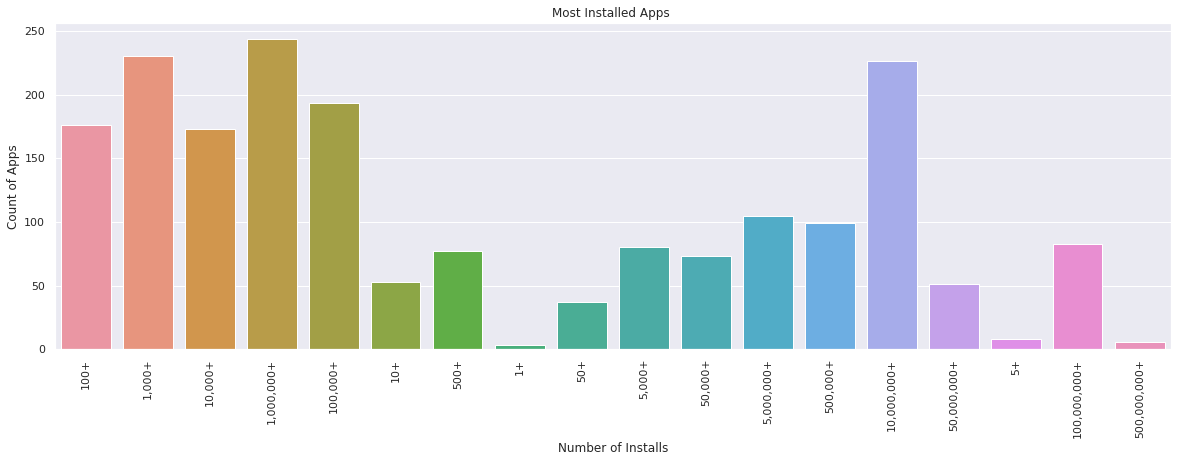

In [ ]:
# check with the max installed.
g = sns.countplot(high_rating_app['Installs'].sort_index(ascending = False))
plt.xticks(rotation = 90)
plt.title("Most Installed Apps ")
plt.ylabel("Count of Apps")
plt.xlabel("Number of Installs")
sns.set(rc = {'figure.figsize':(15,10)})
plt.show()


#Observation 
We can see that there are some apps which has 50crore(500 millions) of downloads and most of the apps has 1 Millions and 10 Millions of downloads also some apps between 0-100 has 100 Millions of downloads.

#9.Now lets see those apps which has 500 millions of download.

In [ ]:
App_Name = high_rating_app[high_rating_app['Installs'] == "500,000,000+"]['App']
print("\n\nAPP with 500 Millions Downloads\n\n")
for app in App_Name:
    print("App:  {}".format(app))




APP with 500 Millions Downloads


App:  Google Duo - High Quality Video Calls
App:  SHAREit - Transfer & Share
App:  Clean Master- Space Cleaner & Antivirus
App:  Google Duo - High Quality Video Calls
App:  SHAREit - Transfer & Share
App:  Security Master - Antivirus, VPN, AppLock, Booster


#observation 
* We got to know there are 6 apps with 500 Milions of downloads.
* As we know Shareit and Google Duo which we use in our day-to-day life has the highest downloads.

#10.Now lets us look for the Low Rated Apps

In [ ]:
low_rating_app = df1[df1['rating_group'] == 'low']
low_rating_app.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,rating_group
518,Just She - Top Lesbian Dating,DATING,1.9,953,19M,"100,000+",Free,0,Mature 17+,Dating,low
520,EliteSingles – Dating for Single Professionals,DATING,2.5,5377,19M,"500,000+",Free,0,Mature 17+,Dating,low
527,Sugar Daddy Dating App,DATING,2.5,277,5.7M,"100,000+",Free,0,Mature 17+,Dating,low
549,EliteSingles – Dating for Single Professionals,DATING,2.5,5377,19M,"500,000+",Free,0,Mature 17+,Dating,low
554,Just She - Top Lesbian Dating,DATING,1.9,953,19M,"100,000+",Free,0,Mature 17+,Dating,low


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



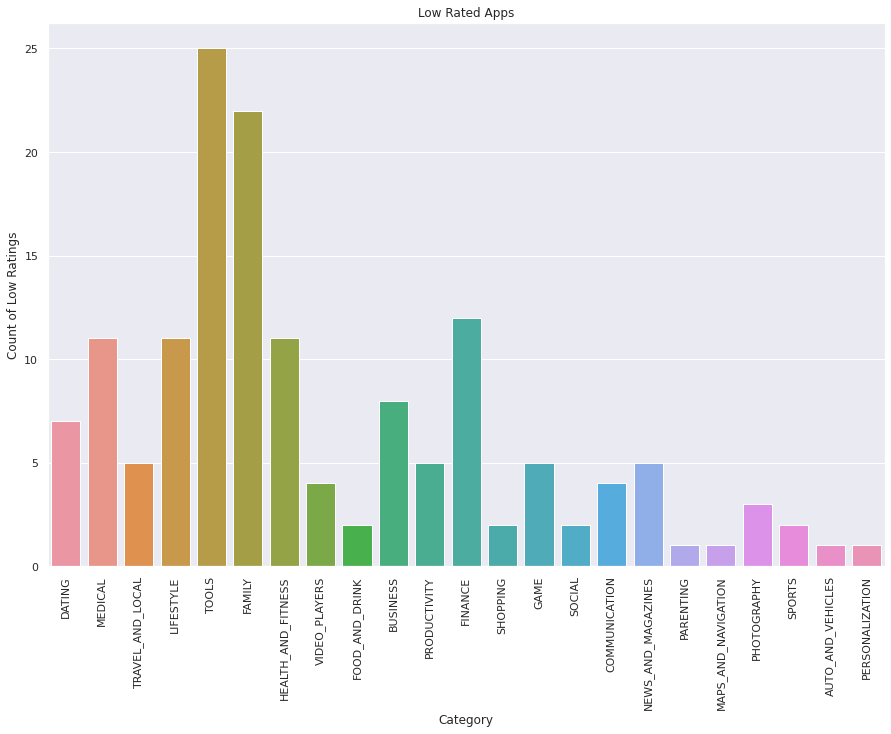

In [ ]:
g = sns.countplot(low_rating_app['Category'])
plt.xticks(rotation = 90)
plt.title("Low Rated Apps")
plt.xlabel("Category")
plt.ylabel("Count of Low Ratings")
sns.set(rc = {'figure.figsize':(15,10)})
plt.show()



#Observation:
* Apps under Tool and Family has Category has the highest number of low rating whereas apps under Sports, Social, Maps_and_Navigation, Auto_and_Vehicles, Shopping and Parenting has least number of low rating.

#11.Now let us see the Age restricted apps.

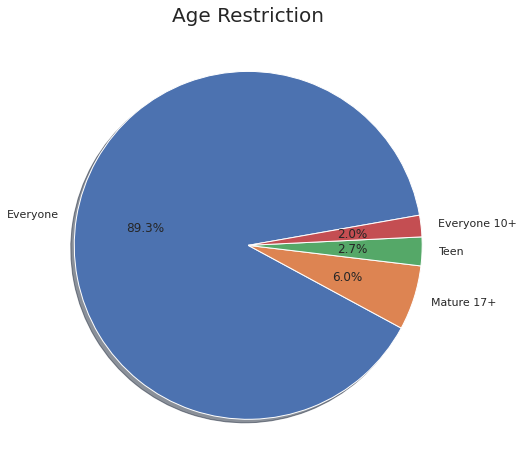

In [ ]:
plt.figure(figsize=(8,8))
rating_name =low_rating_app['Content Rating'].value_counts(sort = True).index
rating_count = low_rating_app['Content Rating'].value_counts(sort = True).tolist()
plt.pie(rating_count, labels=rating_name,autopct='%1.1f%%', shadow=True, startangle=370,)
plt.title('Age Restriction',size = 20)
plt.show()


#Observation:
* We can see 89% of apps is available for all the users of any ages.
* 2% of apps are been restricted for users under age of 10.
* 2.7% of apps are meant only for the Teenagers.
* 6.0% of apps are restricted for users below age 17.

# Conclusion:
(1) Most of Android Apps have rating between 3 and 5, There are only less apps that have rating below 3, Maximum number of apps are rated between 4.2 and 4.6.  
(2) Out of 11000 Apps, 80% of apps are free and 20% are paid.  
(3) Total 6 App with Highest Rating have 500 Millions Downloads.  
(4) Top Apps with 500 Million Downloads are: 
* Google Duo - High Quality Video Calls
* SHAREit - Transfer & Share
* Clean Master- Space Cleaner & Antivirus
* Google Duo - High Quality Video Calls
* SHAREit - Transfer & Share
* Security Master - Antivirus, VPN, AppLock, Booster 

(5) Category like 'FAMILY', 'GAMES' has maximum reviews from the users with rating above 3+.  
(6) Top five apps of 'FAMILY' Category are:
* Super ABC! Learning games for kids! Preschool
* Candy Pop Story
* Dog Run - Pet Dog Simulator
* Puzzle Kids - Animals Shapes and Jigsaw Puzzles
* No. Color - Color by Number, Number Coloring  

(7) From the above Apps we can see that Apps which are focused on Childrens have highest rating.  
(8) Apps under 'TOOLS' Category has the worst rating.  
(9) Out of 100%, 11% of Apps have age restrictions, The rest of the apps are available for everyone.  
(10) In Content_Rating 'Everyone' has more number of rating.  
(11) Overall the Developers can focus on 'FAMILY' categories of apps for good ratings and high number of downloads. 